In [1]:
%matplotlib inline

import cv2
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
img = cv2.cvtColor(cv2.imread('Example Photos/Arizona-Dreaming-550x367.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
XSize = img.shape[0]
YSize = img.shape[1]

In [3]:
imgMask = np.ones((img.shape[0], img.shape[1]), dtype = np.float16) * 1e5
imgIDs = np.ones((img.shape[0], img.shape[1]), dtype = np.int16) * -1

In [4]:
def ColourDistance(c1, c2):
    c1 = c1.astype(np.float16)
    c2 = c2.astype(np.float16)
    dR = (c1[0] - c2[0]) * (c1[0] - c2[0])
    dG = (c1[1] - c2[1]) * (c1[1] - c2[1])
    dB = (c1[2] - c2[2]) * (c1[2] - c2[2])
    hr = (c1[0] + c2[0]) / (2 * 256)
    return ((2 + hr) * dR) + (4 * dG) + ((2 + (255/256) - hr) * dB)

In [5]:
def PositionDistance(P1, P2):
    return (P1[0] - P2[0]) * (P1[0] - P2[0]) + (P1[1] - P2[1]) * (P1[1] - P2[1])

In [6]:
def AddtoAvgCol(avgC, C1, N):
    C1 = C1.astype(np.float64)
    return ((avgC * N)/(N+1)) + (C1  / (N+1))

In [7]:
def AddtoAvgPos(avgP, P1, N):
    return (((avgP[0] * N) + P1[0] ) / (N+1), ((avgP[1] * N) + P1[1] ) / (N+1))

In [8]:
def RemFromAvgCol(avgC, C1, N):
    return (avgC - (C1 / N)) * (N/(N-1))

In [9]:
def RemFromAvgPos(avgP, P1, N):
    return (((avgP[0] - (P1[0] / N)) * (N/(N-1))), ((avgP[1] - (P1[1] / N)) * (N/(N-1))))

In [10]:
Kx = 16
Ky = 20
#THRESHOLD = (Set threshold to a low value, for now i will just repeat steps until a low value is reached)

In [11]:
Sx = int(img.shape[0] / (Kx * 2))
Sy = int(img.shape[1] / (Ky * 2))

In [12]:
#Make clusters
Clusts = []
pos = (0, 0)
for x in range(Kx):
    pos  = (pos[0] + Sx, 0)
    for y in range(Ky):
        pos  = (pos[0], pos[1] + Sy)
        Clusts.append((pos, img[pos], 1))
        pos  = (pos[0], pos[1] + Sy)
    pos  = (pos[0] + Sx, 0)

In [13]:
rat = 768 * 768 / (Sx * Sx * Sy * Sy)
for i in range(10):
    for k in range(len(Clusts)):
        #print(len(Clusts[-1][0]), len(Clusts[-1][1]), 1)
        C = Clusts[k]
        for x in range(int(max(0, (C[0][0] -  (2 * Sx)))), int(min(XSize, C[0][0] + (2 * Sx)))):
            for y in range(int(max(0, (C[0][1] -  (2 * Sy)))), int(min(YSize, C[0][1] + (2 * Sy)))):
                pos = (x, y)
                ColDis = ColourDistance(C[1], img[pos])
                PosDis = PositionDistance(C[0], pos) * rat
                dis = math.sqrt(ColDis + PosDis)
                if(imgMask[pos] > dis):
                    imgIDs[pos] = k
                    imgMask[pos] = dis
        Clusts[k] = (Clusts[k][0], Clusts[k][1], 0)
    print("Written Vals, Not Calculating Clusts")
    for x in range(XSize):
        for y in range(XSize):
            pos = (x, y)
            KVal = imgIDs[pos]
            if(KVal == -1):
                continue
            Clusts[KVal] = (AddtoAvgPos(Clusts[KVal][0], pos, Clusts[KVal][2]),
                            AddtoAvgCol(Clusts[KVal][1], img[pos], Clusts[KVal][2]),
                            Clusts[KVal][2] + 1)
            

Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts
Written Vals, Not Calculating Clusts


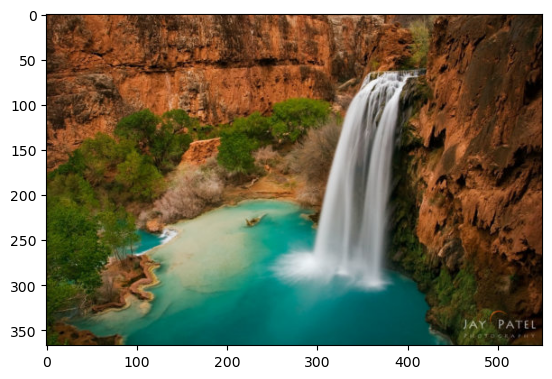

In [14]:
plt.imshow(img)

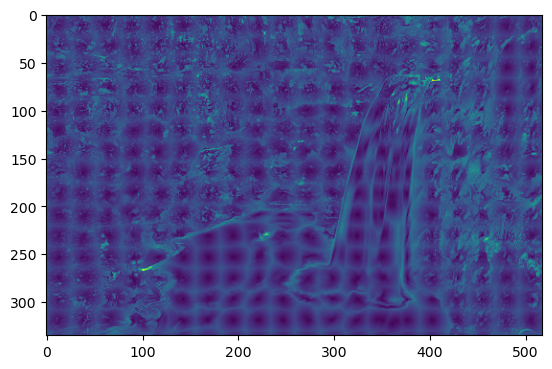

In [15]:
plt.imshow(imgMask[:-32, :-32])

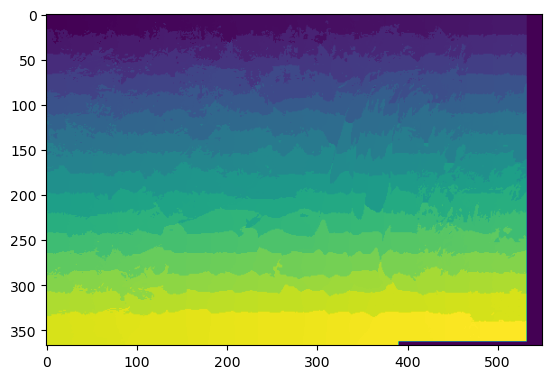

In [16]:
plt.imshow(imgIDs)

In [17]:
imgS = np.zeros(img.shape, dtype = img.dtype)

for x in range(imgIDs.shape[0]):
    for y in range(imgIDs.shape[1]):
        if(imgIDs[(x, y)] == -1):
            continue
        imgS[(x,y)] = Clusts[imgIDs[(x, y)]][1].astype(np.uint8)


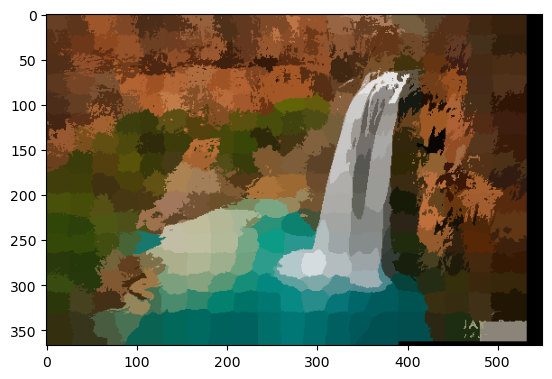

In [18]:
plt.imshow(imgS)

In [19]:
cv2.imwrite('Example Photos/Fin2SLIC.jpg', cv2.cvtColor(imgS, cv2.COLOR_RGB2BGR))

True